У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/yulu_rental.csv')
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

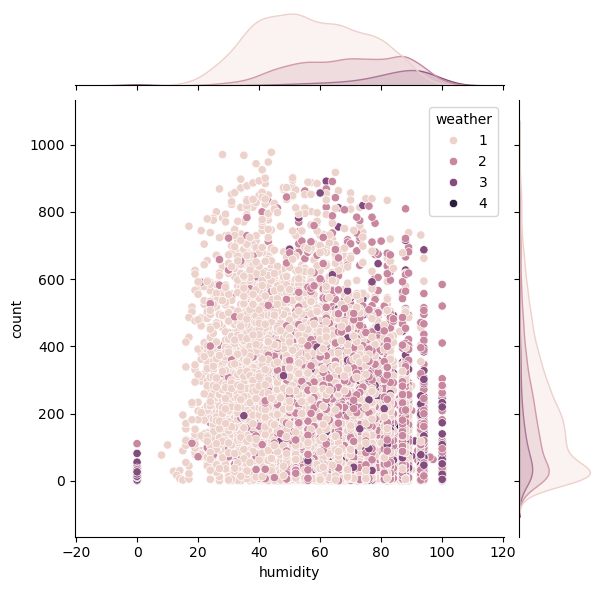

In [2]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

## Спостереження

1. Вологість переважно зосереджена в діапазоні від 30% до 80%. Це може свідчити про комфортні погодні умови для активності користувачів.
2. Значна кількість користувачів спостерігається при середніх значеннях вологості. Крайні значення вологості (нижче 20% або вище 80%) демонструють знижену активність.
3. Переважають умови з індексами 1 (сонячно) та 2 (хмарно). Активність користувачів значно зменшується при погодних умовах 3 (слабкий дощ) та 4 (сніг або дощ).
4. Умови з високою вологістю (>80%) частіше пов'язані з умовами погоди типу 3 або 4, де активність користувачів значно нижча.

## Висновки
- Умови з високою вологістю та сильними опадами (типи погоди 3 і 4) знижують кількість користувачів. Для таких періодів можна розглянути спеціальні акції чи стимули для залучення клієнтів.
- В умовах поганих погодних умов, компанії варто задуматися про оптимізацію кількості робочих ресурсів (наприклад, зменшити кількість людей-саппорту на змінах, знизити обсяги заміни та зарядки транспортних засобів)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [17]:
df_spring_summer = df[df['season'].isin([1, 2])]
df_spring_summer

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8146,2012-06-19 19:00:00,2,0,1,1,32.80,38.635,59,15.0013,82,432,514
8147,2012-06-19 20:00:00,2,0,1,1,32.80,37.880,55,16.9979,59,399,458
8148,2012-06-19 21:00:00,2,0,1,1,31.16,35.605,62,11.0014,37,239,276
8149,2012-06-19 22:00:00,2,0,1,1,29.52,34.850,79,6.0032,51,240,291


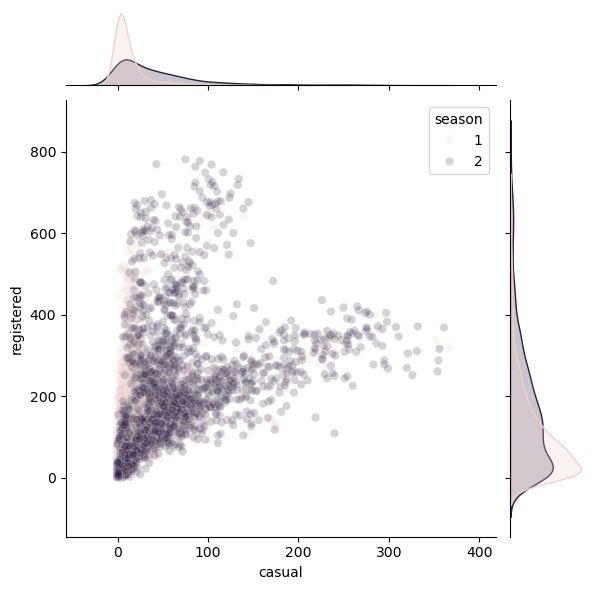

In [18]:
sns.jointplot(data=df_spring_summer, x="casual", y="registered", hue="season", alpha=.2);

## Спостереження

1. Прослідковуємо тенденцію, що зі збільшенням кількості "випадкових" (casual) користувачів, кількість зареєстрованих (registered) також зростає. Це може вказувати на позитивну залежність між цими категоріями (наприклад, що випадкові користувачі в кінцевому випадку вирішують зареєструватися)
2. Для сезону 1 (весна) активність користувачів зосереджена ближче до нижніх значень обох змінних. Це означає, що у весняний період активність менша. Тоді як влутку (сезон 2) точки мають ширший розкид, що свідчить про більшу активність у цей сезон.
3. Найвища концентрація точок спостерігається в діапазоні, де casual менше ніж 100 і registered менше ніж 200. Це може означати, що велика частка користувачів є зареєстрованими навіть за низького рівня "випадкових" користувачів.
4. У літній сезон видно кілька точок із високими значеннями casual (до 400) та registered (понад 800), що свідчить про пікові періоди активності.

## Висновки
- Літній період має набагато більшу активність, що робить його ідеальним для маркетингових акцій і збільшення залучення користувачів.
- Так як існує позитивний зв'язок між "випадковими" і зареєстрованими користувачами, то є сенс збільшити стимули для "випадкових" користувачів (наприклад, n безкоштовних поїздок на певний (обмежений) період часу; або через реферальні програми для зареєстрованих користувачів - "запроси друга та отримай поїздку безкоштовно"
- Аби збільшити активність у весняний період, слід також розглянути спеціальні заходи чи акції, щоб залучити більше користувачів.
- В часи "пікової" активності варто ретельно спланувати ресурси компанії (персонал, транспорт, саппорт і тд), аби безперешкодно менеджити більший наплив користувачів та потенційно можливі проблеми/звернення.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


<Axes: xlabel='weather', ylabel='humidity'>

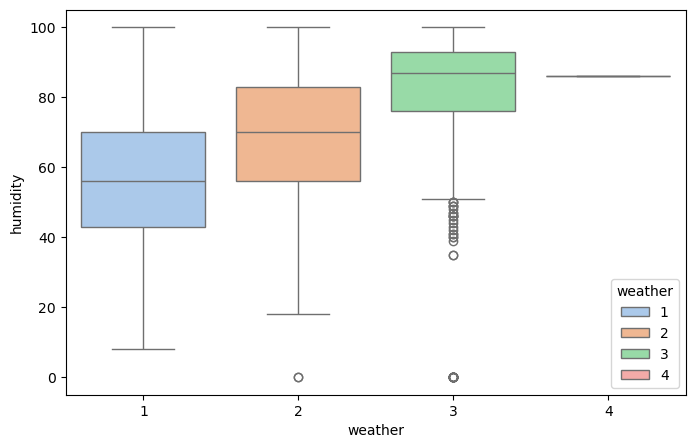

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='humidity', data=df, hue='weather', palette='pastel')

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [53]:
df_filtered = df[['casual', 'registered', 'count', 'workingday']]
df_filtered.head()

,casual,registered,count,workingday
0,3,13,16,0
1,8,32,40,0
2,5,27,32,0
3,3,10,13,0
4,0,1,1,0


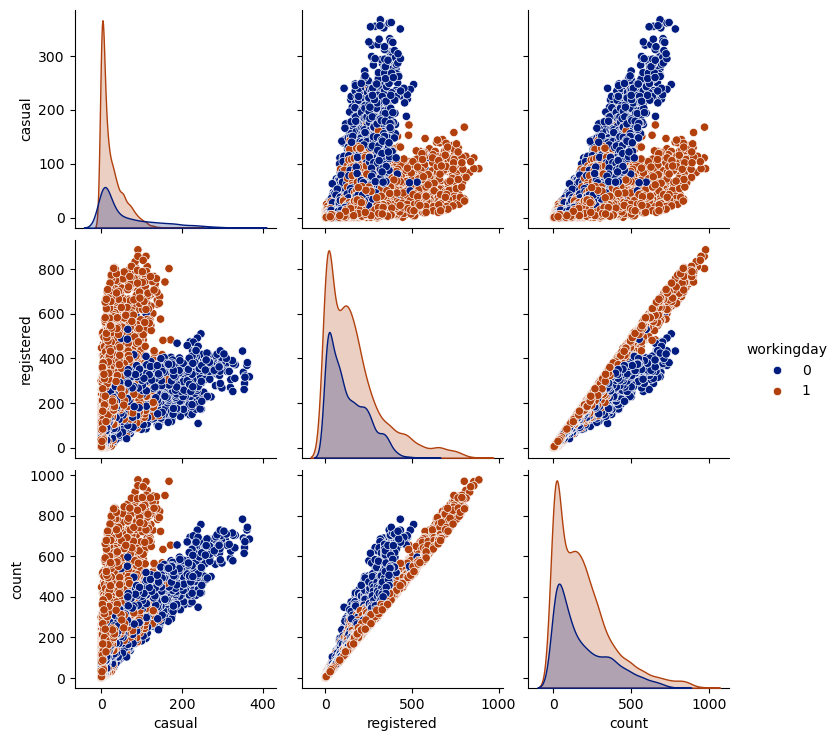

In [54]:
sns.pairplot(data=df_filtered, hue='workingday', palette='dark')

## Спостереження

1. На робочі дні (позначені помаранчевими точками) значно більше зареєстрованих користувачів.
У вихідні та святкові дні (сині точки) кількість зареєстрованих користувачів значно менша.
2. У вихідні дні (сині точки) активність неформальних користувачів значно вища, ніж у робочі.
У робочі дні (помаранчеві точки) кількість "випадкових" користувачів помітно менша.
3. У робочі дні загальна кількість користувачів складається переважно із зареєстрованих користувачів.
У вихідні дні активність "випадкових" користувачів значно підвищує загальну кількість.
Взаємозв'язок між змінними:
4. Чітко видно лінійний взаємозв'язок між registered та count, оскільки більшість зареєстрованих користувачів домінують у загальній кількості.
Для casual і count взаємозв'язок також є, але менш виражений через велику різницю між вихідними та робочими днями.

## Висновки
- Більшість користувачів у робочі дні — зареєстровані користувачі. Це може бути пов’язано з використанням велосипедів для щоденних поїздок на роботу чи навчання.
- У вихідні активність "випадкових" користувачів значно вища, що може бути пов’язано із використанням велосипедів для розваг чи відпочинку.

## Рекомендації
- У вихідні варто орієнтувати маркетингові кампанії на "випадкових" користувачів, пропонуючи акції для короткострокового прокату.
- У робочі дні варто покращувати сервіси для зареєстрованих користувачів, оскільки вони є основною аудиторією.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [47]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [48]:
df['date'] = df.datetime.dt.date

In [56]:
df_viz = df[['date', 'registered', 'casual']].groupby('date', as_index=False).sum()
df_viz.head()

,date,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82


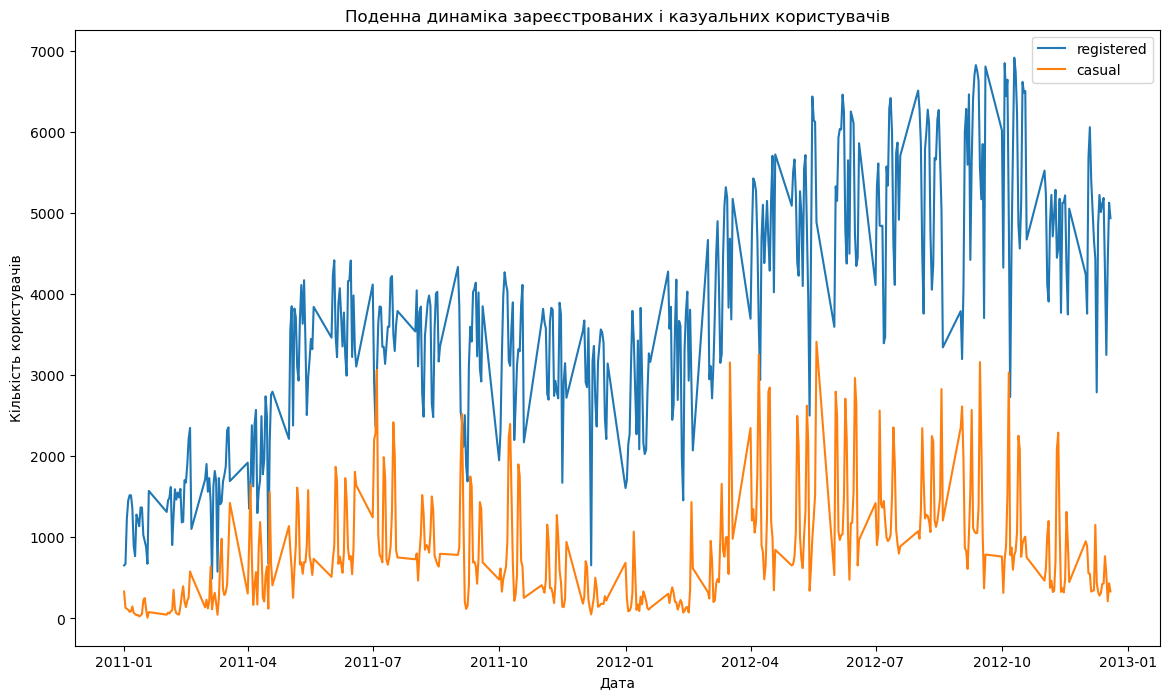

In [61]:
ax = df_viz.plot(
    x='date', 
    y=['registered', 'casual'], 
    figsize=(14, 8), 
    title='Поденна динаміка зареєстрованих і казуальних користувачів'
)

ax.set_xlabel('Дата')
ax.set_ylabel('Кількість користувачів')

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
